<a href="https://colab.research.google.com/github/uday-routhu/Prediction-of-Product-Sales/blob/master/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Udayakumar Routhu

# Project  - Data Inspection

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2:

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Data Dictionary

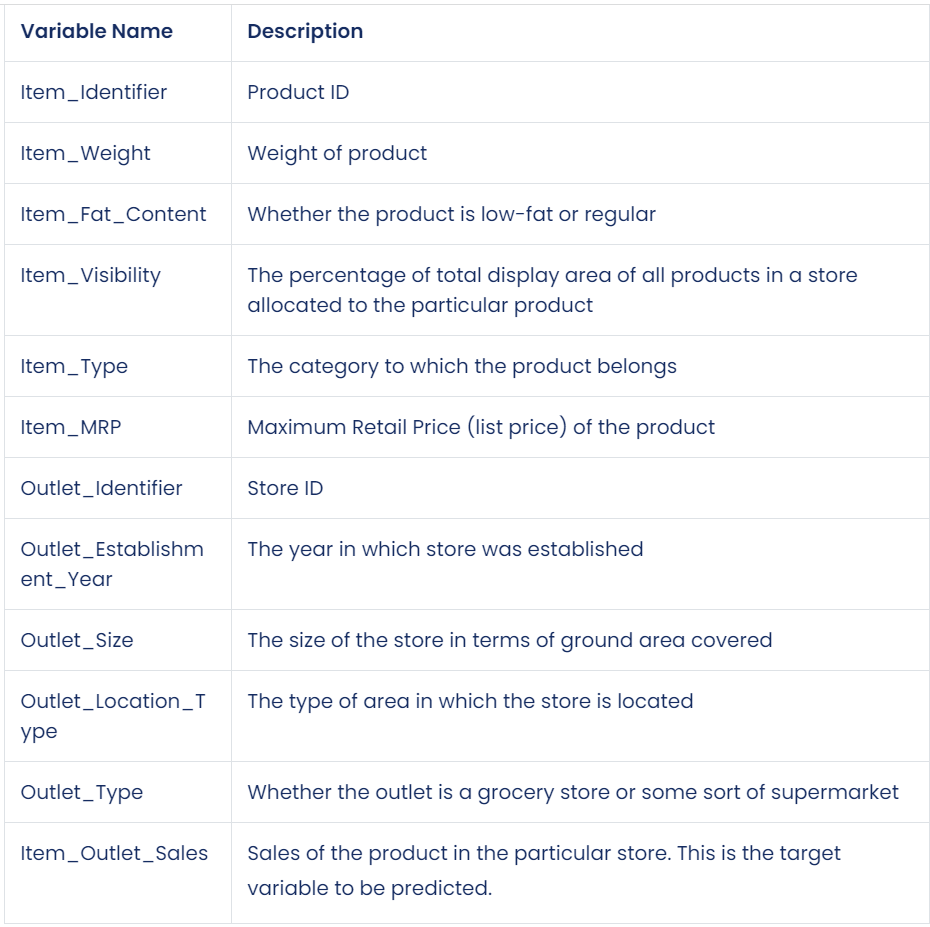

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
from google.colab import drive
set_config(transform_output='pandas')

In [2]:
#Mount the drive
drive.mount('/content/data')

Mounted at /content/data


In [3]:
#create fname path
fname="/content/data/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

## Loading Data

In [4]:
df_sales_prediction = pd.read_csv(fname)

In [5]:
df_ml = df_sales_prediction.copy()

In [6]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

How many rows/columns:

In [8]:
df_sales_prediction.shape

(8523, 12)

 - There are 8523 rows and 12 columns

Checking the data types:

In [9]:
df_sales_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


- All the data types assign as looks good

### Duplicated Data
Checking for duplicated data:

In [10]:
df_sales_prediction.duplicated().sum()

0

- There are 0 duplicates in the dataset which we will no drop.

In [11]:
df_sales_prediction.drop_duplicates(inplace = True)

In [12]:
df_sales_prediction.duplicated().sum()

0

- Checking to make sure duplicates were dropped.

### Missing Values
Checking for missing values:

In [13]:
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data (optional)

In [14]:
df_sales_prediction.isna().sum() / len(df_sales_prediction) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column. (17.16%)
  - There are `2410` missing values in the `Outlet_Size` column. (28.27%)

- In order to make informed decisions about how to handle missing data, we will do some additional EDA.

Inspecting Experience Level:

- Here we are setting the style to use for seaborn so that all the visuals have the same format.

In [15]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-15-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-15-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [16]:
# Finding MISSING columns using select_dtypes
obj_columns = df_sales_prediction.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
#df_sales_prediction[obj_columns] = df_sales_prediction[obj_columns].fillna('Missing')

In [18]:
# Finding MISSING columns using select_dtypes
num_columns = df_sales_prediction.select_dtypes('number').columns

In [19]:
#Address the missing values by using a placeholder value.
#df_sales_prediction[num_columns] = df_sales_prediction[num_columns].fillna(-1)

In [20]:
#Confirm that there are no missing values after addressing them.
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [21]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


- Upon further investigating, all of the columns has right Dtype so no further data type change needed.

### Inspecting Categorical Columns & Addressing Inconsistent Values

- We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.

In [22]:
data_types = df_sales_prediction.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [23]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sales_prediction[col].value_counts(dropna=False))
    print("\n\n")
    print(df_sales_prediction[col])

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object
- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object
- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648


- After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the `Item_Fat_Content` column:
  - `LF` should be `Low Fat`
  - `reg` should be `Regular`
  - `low fat` should be `Low Fat`

- We will address these inconsistencies with a data map and use a dictionary to replace the inconsistent categories.

In [24]:
job_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}

df_sales_prediction['Item_Fat_Content'] = df_sales_prediction['Item_Fat_Content'].replace(job_content_map)

- We will now verify that all of the inconsistent values in that column have been addressed.

In [25]:
df_sales_prediction['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features

- We will now view use df.describe() to view the summary statistics for the numeric features.

In [26]:
df_sales_prediction.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- Here is another method to look at just the `mean`, `min`, and `max` for each numeric column.

In [27]:
stats =  df_sales_prediction.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project  - Data Mining

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.
Please feel free to add more than the minimum. Remember this is your chance to display your skills!

## Exploratory Visuals & Analysis

- Note: There are many different ways students could tackle this EDA. Additionally, there are more advanced ways to plot the data.

- Approaches: We will go Column-by-Column with the EDA using a function

In [28]:
#checking info again
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


- For each numeric feature, we will plot the distribution and a boxplot.

In [29]:
num_cols = df_sales_prediction.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### 1. EDA Using Loops

### Column-by-Column EDA using a function (plus markdown interpretations for each)

- Below, I chose not to visual the `Outlet_Establishment_Year` and the `Item_Outlet_Sales` since this will only show the counts for each particular year or the counts for the remote work ratio.
   - `Outlet_Establishment_Year`: 1985,1987,1999,1997,2004,2002,2009,2007,1998
   - `Item_Outlet_Sales`: 958.7520,1342.2528,703.0848,1845.5976,1278.3360,4124.6310,6622.7126,1614.5650,5602.7070,2778.3834

In [30]:
df_sales_prediction['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [31]:
def plot_numeric(df_sales_prediction,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df_sales_prediction,x = col,ax = axes[0])
  mean_value = df_sales_prediction[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df_sales_prediction[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");

  sns.boxplot(data=df_sales_prediction, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

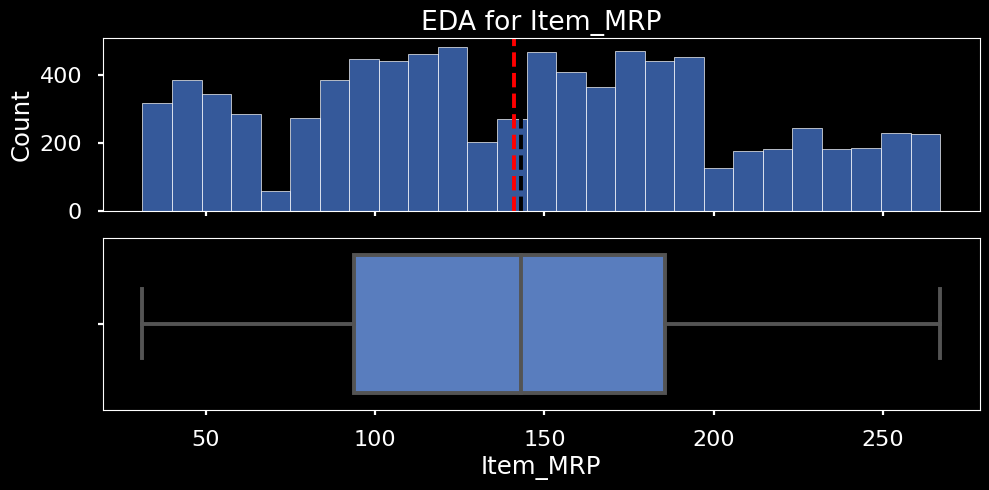

In [32]:
plot_numeric(df_sales_prediction,'Item_MRP')

- Here on the boxplot, you can clearly see that there are several outliers in the Item_MRP column column. These could be valid data points, or they could be an error.
- Since there are Item_Weight included in this dataset, and they most likely cause increase of Item_MRP rate, I will leave these datapoints in place.

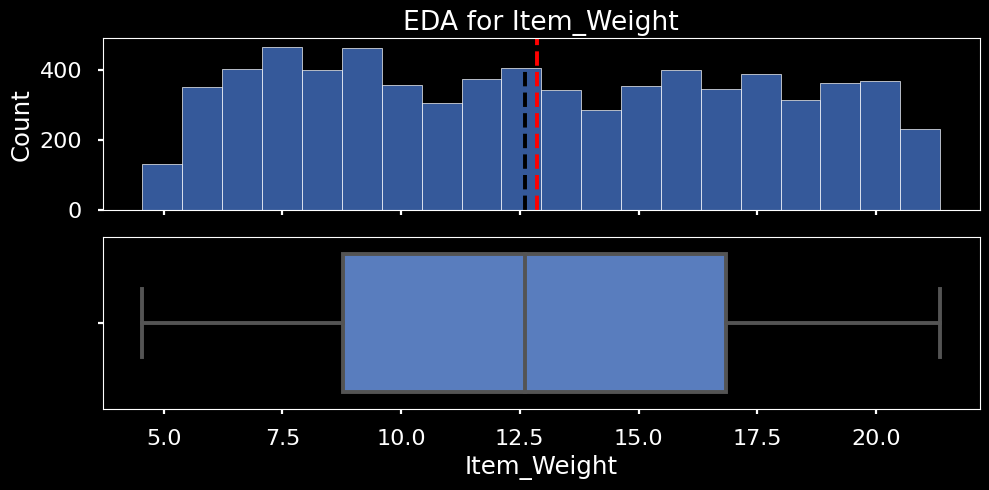

In [33]:
plot_numeric(df_sales_prediction,'Item_Weight')

- You can clearly see that the median is around 10 pounds for this particular column. Imputing the values of this feature, definitely added to the taller bar being a bit higher.
- The boxplot shows that there are some outliers in terms of Item_Weight. These are most likely valid values.

### Visualizing with Barplots
- Boxplots to view statistical summaries of numerical features in your dataset..

In [34]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)
    ## Plot barplot
    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df_sales_prediction[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [35]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


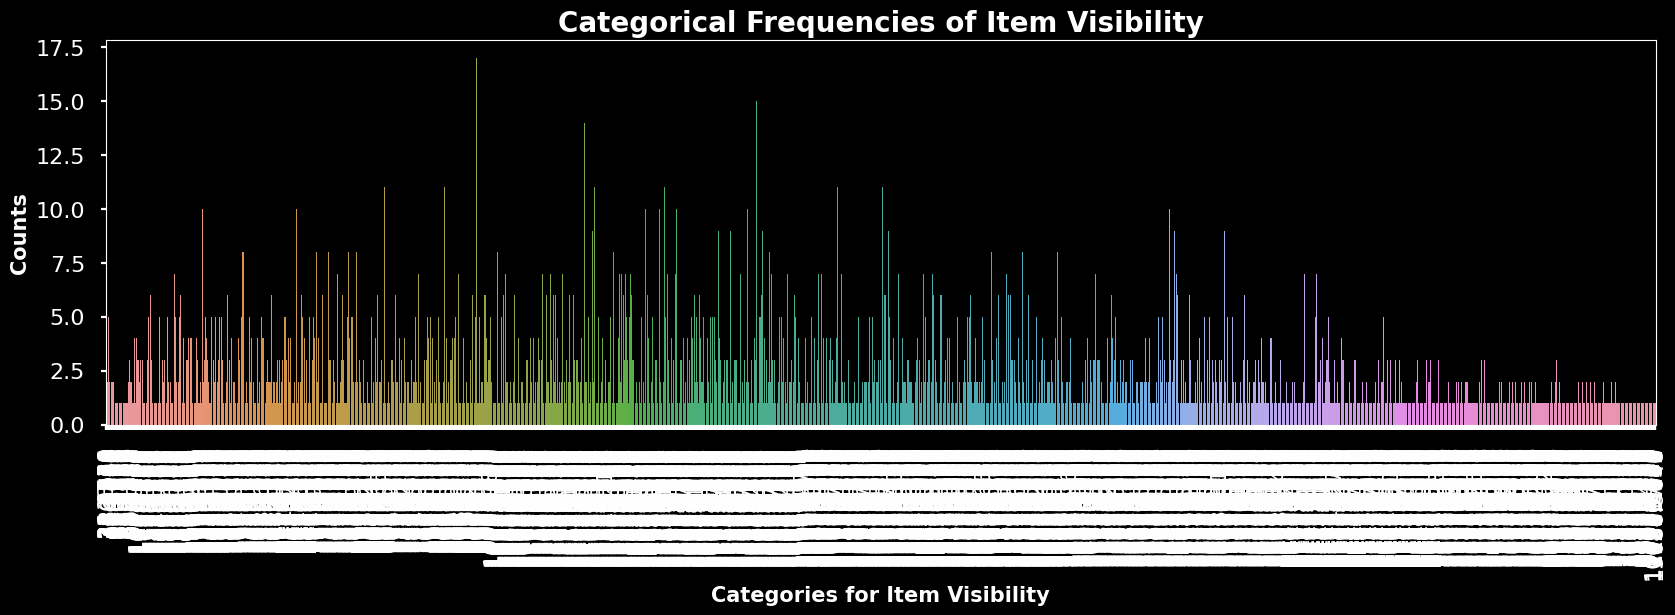

In [36]:
fig, ax = plot_bar(df_sales_prediction, 'Item_Outlet_Sales', 'Item Visibility');
print(df_sales_prediction['Item_Outlet_Sales'].value_counts())

- From this graph, we can see that there are mostly Item_outlet_sales based on counts(year).
- Also, we see that the least amount for oldest year.

### Visualizing with countplots
  . Countplots to view the frequency of each class of categorial features in your dataset.

In [37]:
cat_cols = df_sales_prediction.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


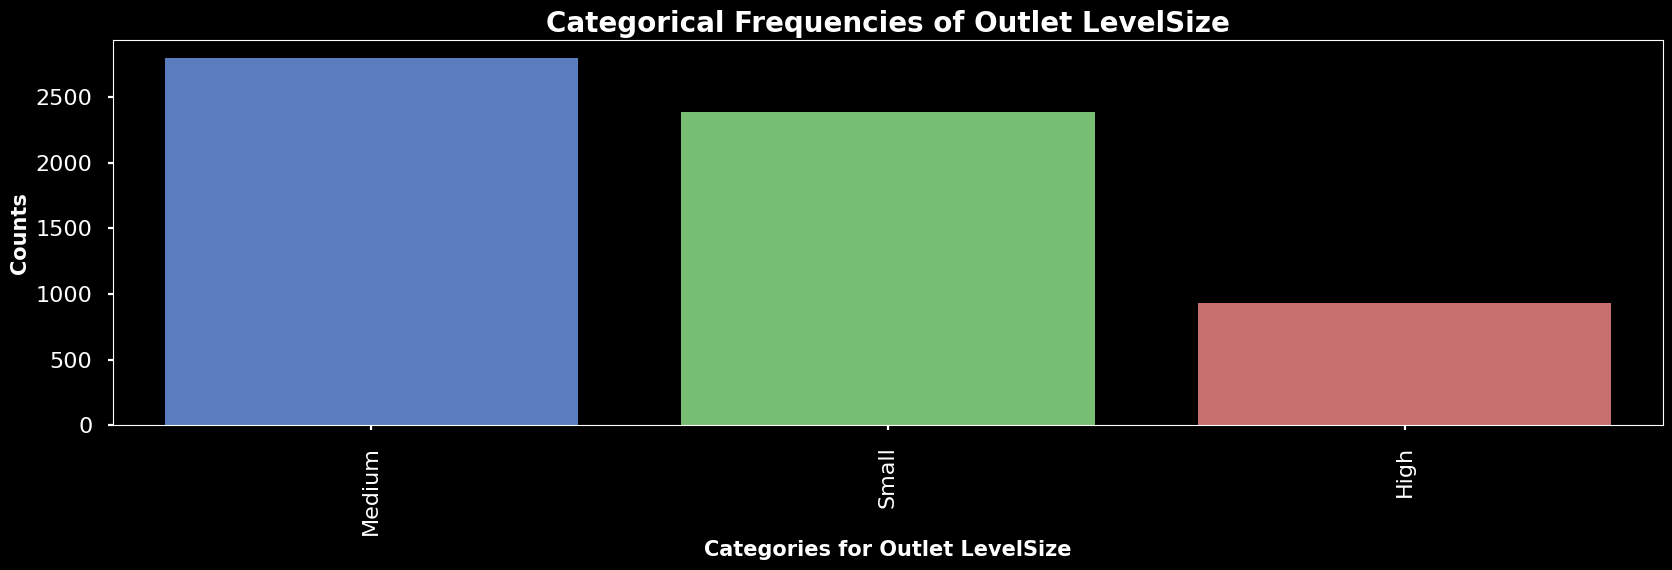

In [38]:
fig, ax = plot_bar(df_sales_prediction, 'Outlet_Size', 'Outlet LevelSize');
print(df_sales_prediction['Outlet_Size'].value_counts())

- Outlevel level size is higher for medium
- Low level size for the High

- Super market Type1 outlets are more compared other categories
- Grocery , supermarket type3, type2 are having similar counts

### EDA for Correlated Features

<ipython-input-39-d29719b8ac9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sales_prediction.corr(),annot=True,cmap='Blues');


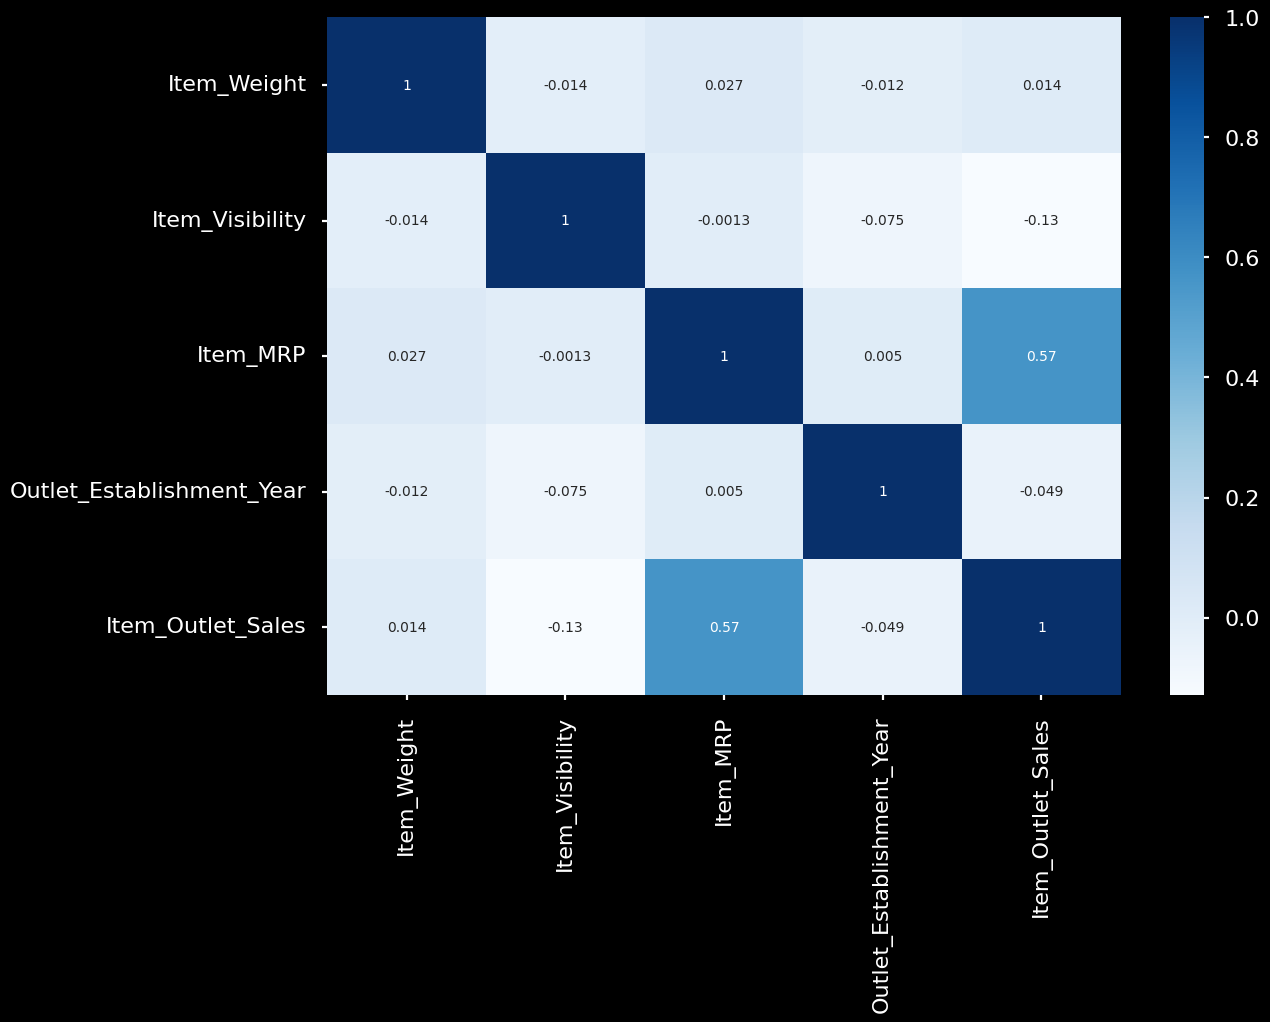

In [39]:
sns.heatmap(df_sales_prediction.corr(),annot=True,cmap='Blues');

- There is weak positive co-relation between Item_weight and Item_MRP
- Other co-relations are neglizable

# Project 1 - Part 4 (Core):
We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​

# For each feature:
*   Add a new markdown header.
*   Paste the feature's definition from the data dictionary into a markdown cell.
*  Create a univariate visualization showing the distribution of values/categories.
*  You may use the EDA functions from the previous lessons or create your own visualizations.
* Answer the following questions from the Feature Inspection lesson in a markdown cell:
  * What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
Is the feature constant or quasi-constant?
  * What is the cardinality? Is it high (>10)?
  * Would we know this feature before the target is determined?
  * Is there a business case/understanding reason to exclude based on our business case?
* Create a multivariate visualization plotting each feature vs. the target.
  * You may use the EDA functions from the previous lessons or create your own visualizations.​
* Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  * Based on your business understanding, would you expect this feature to be a  predictor of the target?
  * Does this feature appear to be a predictor of the target?

In [40]:
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

. Create a univariate visualization showing the distribution of values/categories
   * You may use the EDA functions from the previous lessons or create your own visualizations.

In [41]:
def explore_categorical(df, x,figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [42]:
def plot_categorical_vs_target(df, x, y,figsize=(6,4),order=None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  # or drop nulls prevent unwanted 'nan' group in stripplot
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [43]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")

In [44]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

##Inspecting Each Feature

#####Outlet_Size

- Outlet_Size: The size of the store in terms of ground area covered

In [45]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df_sales_prediction[feature].dtype

dtype('O')

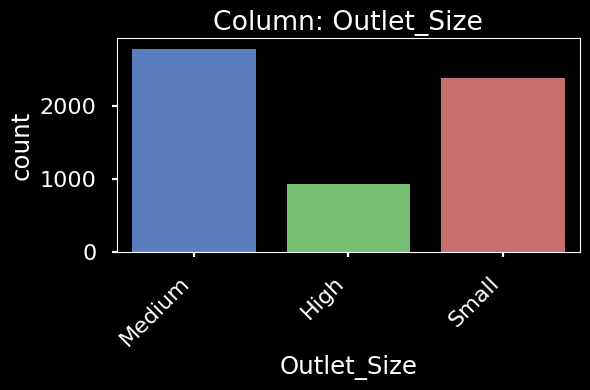

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [46]:
# Test our function with the print statements
explore_categorical(df_sales_prediction, 'Outlet_Size');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%).
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

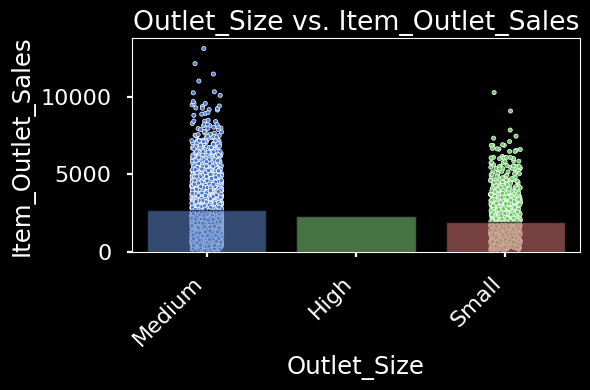

In [47]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the Outlet_Size's
___

#####Item_Identifier

- Item_Identifier: Store ID

In [48]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df_sales_prediction[feature].dtype

dtype('O')

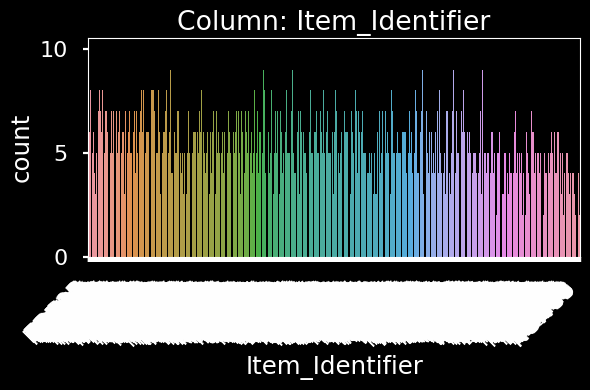

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [49]:
explore_categorical(df_sales_prediction, 'Item_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 155 unique categories.
  - high cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

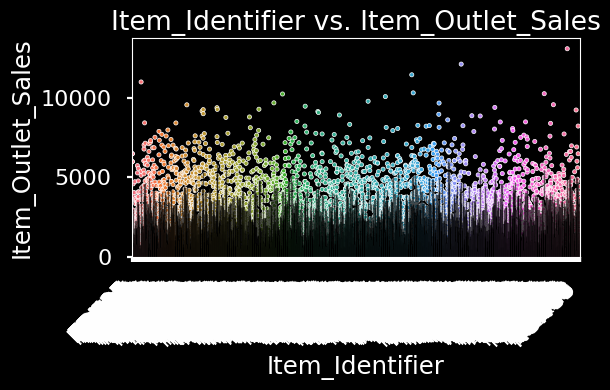

In [50]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the Item_Identifier, even though some have similar means.

___



#####Item_Fat_Content

- Iten_Fat_Content: Whether the product is low-fat or regular

In [51]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_sales_prediction[feature].dtype

dtype('O')

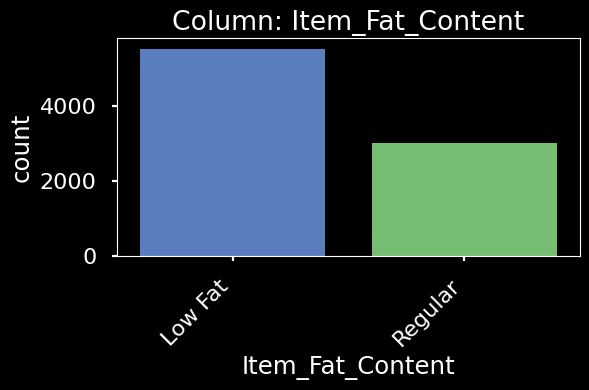

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df_sales_prediction, 'Item_Fat_Content');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

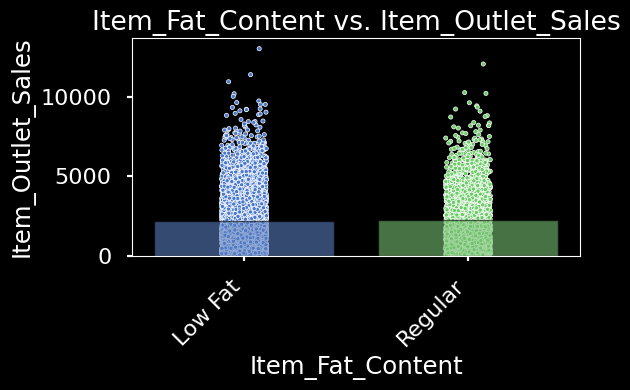

In [53]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the Fat Content, even though some have similar means.

___

#####Item_Type

- Item_Type:    The category to which the product belongs

In [54]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df_sales_prediction[feature].dtype

dtype('O')

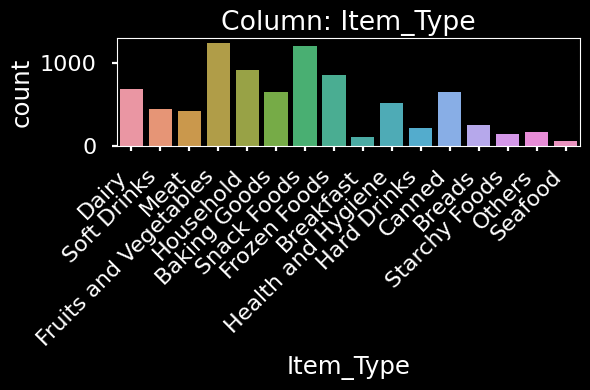

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [55]:
explore_categorical(df_sales_prediction, 'Item_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - high cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

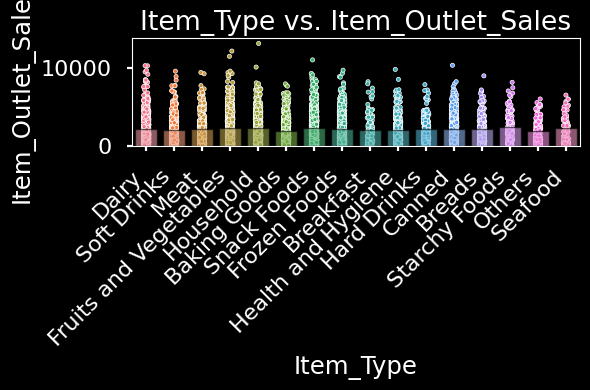

In [56]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the Item Types, even though some have similar means.

___

#####Outlet_Identifier

Outlet_Identifier: Store ID

In [57]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df_sales_prediction[feature].dtype

dtype('O')

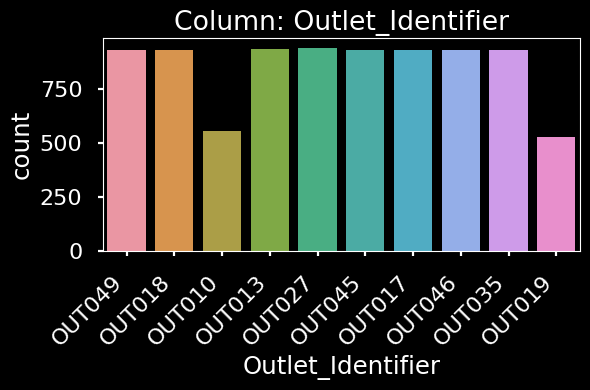

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [58]:
explore_categorical(df_sales_prediction, 'Outlet_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

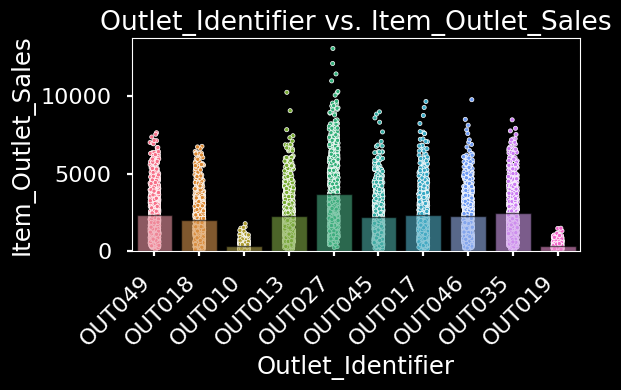

In [59]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the OUtlet identifiers, even though some similar mean.

___

#####Outlet_Location_Type

- Outlet_Location_Type: The type of area in which the store is located

In [60]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df_sales_prediction[feature].dtype

dtype('O')

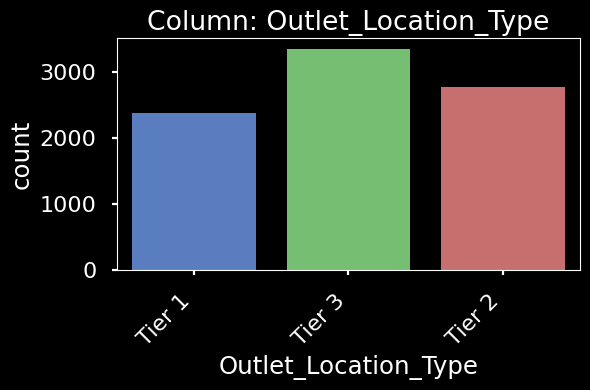

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [61]:
explore_categorical(df_sales_prediction, 'Outlet_Location_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

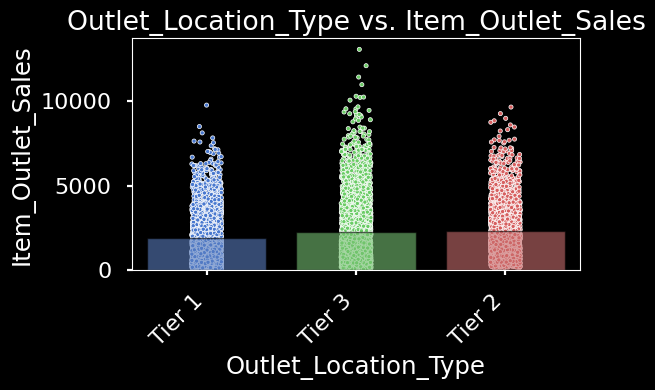

In [62]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the Outlet locations, even though some have similar means.

___

#####Outlet_Type

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

In [63]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df_sales_prediction[feature].dtype

dtype('O')

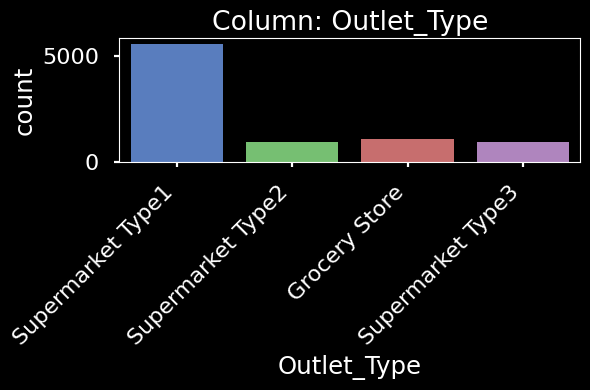

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [64]:
explore_categorical(df_sales_prediction, 'Outlet_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

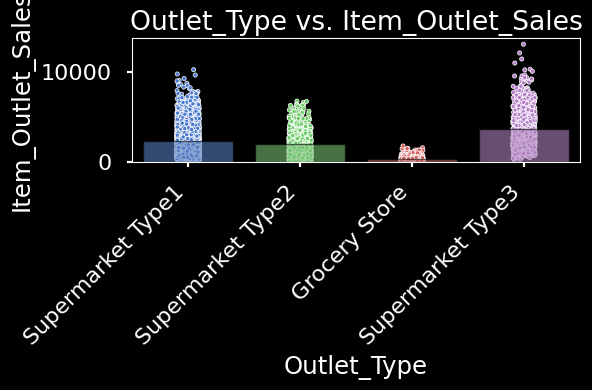

In [65]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales_prediction, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the outlet_type, even though some have similar means.

___

#####Item_Weight

- Item_Weight: Weight of product

In [66]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_sales_prediction[feature].dtype

dtype('float64')

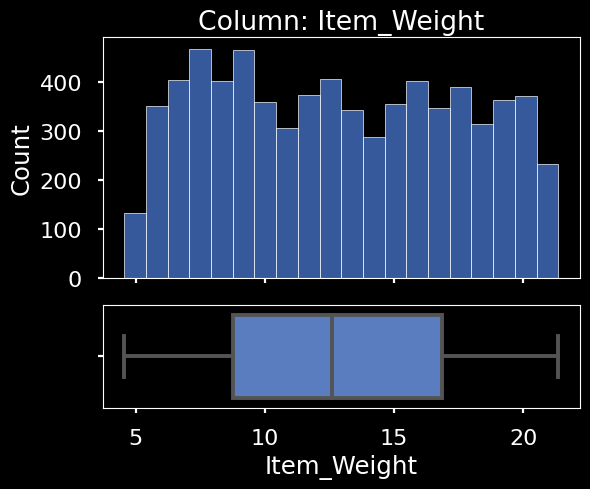

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [67]:
explore_numeric(df_sales_prediction, "Item_Weight")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%)
  - Impute with Median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable(numeric).
  
5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

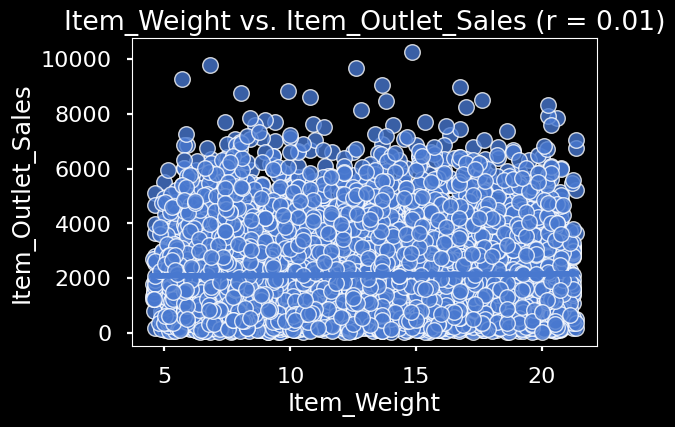

In [68]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales_prediction,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think Item_Weight is consistent.
  - Does this feature appear to be a predictor of the target?
    - Yes
___

#####Item_Visibility

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [69]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df_sales_prediction[feature].dtype

dtype('float64')

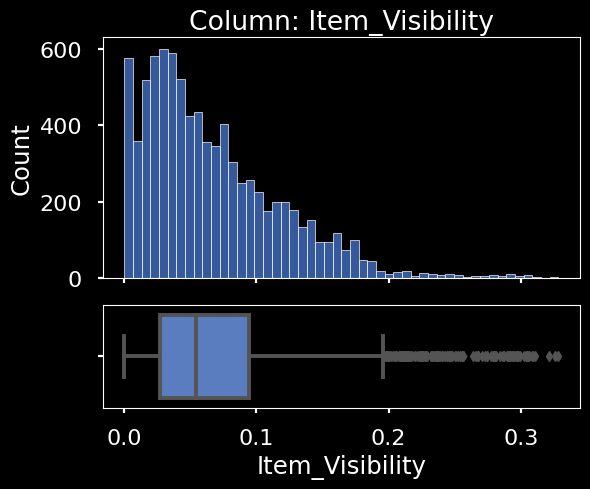

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [70]:
explore_numeric(df_sales_prediction, "Item_Visibility")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable(numeric).
  
5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

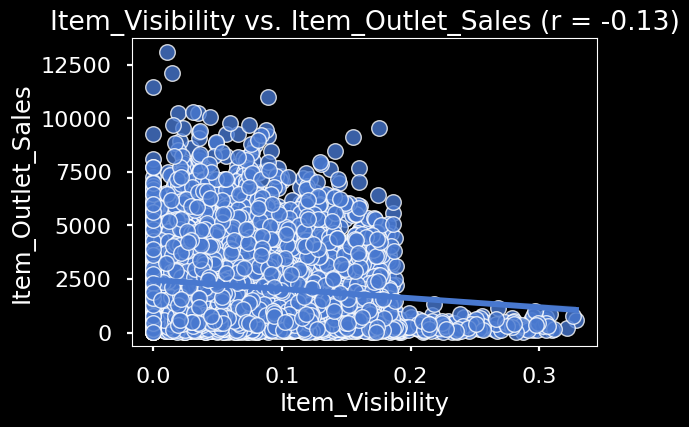

In [71]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales_prediction,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think outlet sales go down at low Item Visibility
  - Does this feature appear to be a predictor of the target?
    - Yes, if item visibility higher then sales may down

___

#####Item_MRP

- Item_MRP: Maximum Retail Price (list price) of the product

In [72]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df_sales_prediction[feature].dtype

dtype('float64')

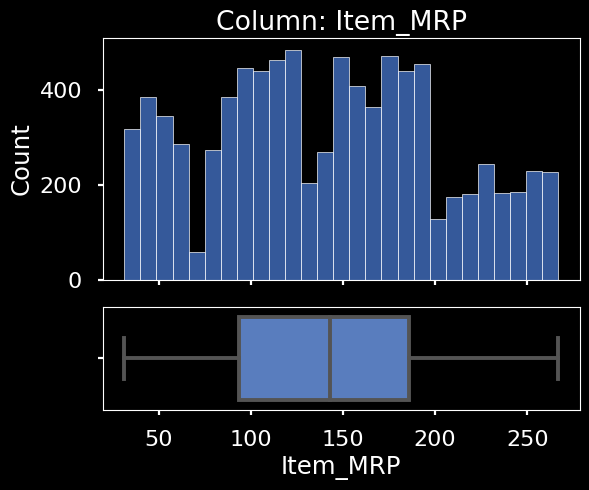

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [73]:
explore_numeric(df_sales_prediction, "Item_MRP")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable(numeric).
  
5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

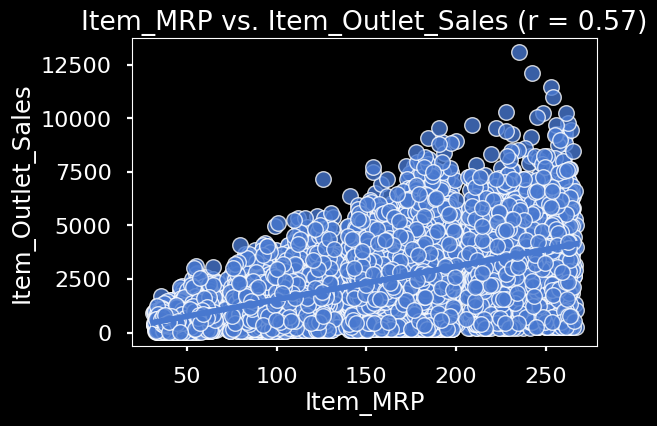

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales_prediction,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think sales went up at high MRP .
  - Does this feature appear to be a predictor of the target?
    - Yes, sales had consistent increase

___

#####Outlet_Establishment_Year

- Outlet_establishment_year: The year in which store was established

In [75]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df_sales_prediction[feature].dtype

dtype('int64')

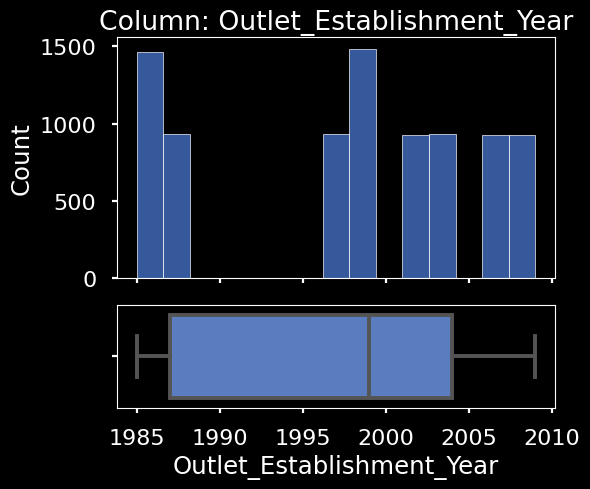

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [76]:
explore_numeric(df_sales_prediction, "Outlet_Establishment_Year")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable(numeric).
  
5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

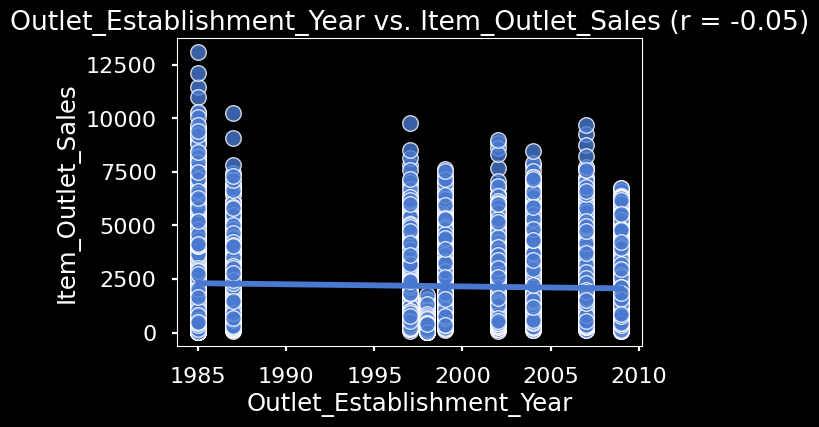

In [77]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales_prediction,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think There was no sales between 1990 to 1995.
  - Does this feature appear to be a predictor of the target?
    - Yes, 1985 has the higest sales

___

####Item_Outlet_Sales

- Item_Outlet_Sales: Sales of the product in the particular store. This is the target variable to be predicted.

In [78]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df_sales_prediction[feature].dtype

dtype('float64')

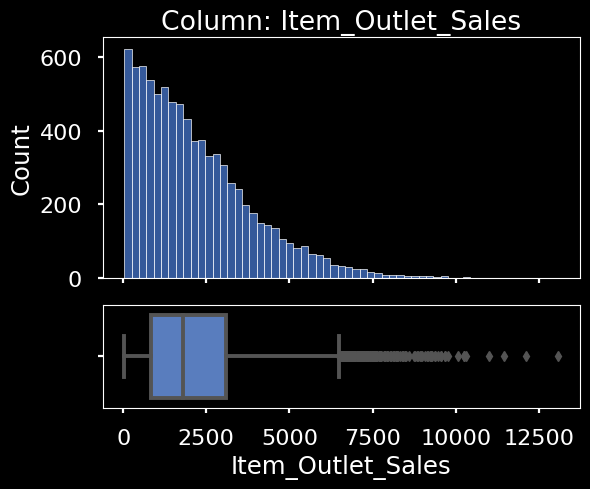

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [79]:
explore_numeric(df_sales_prediction, "Item_Outlet_Sales")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)
  - Nothing to Impute.

3. Is the feature constant or quasi-constant?
  - Not a feature.

4. What is the cardinality? Is it high?
  - Not applicable(numeric).
  
5. Would we know this BEFORE the target is determined?
  - Yes, since it is our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, since it is our target!

# Project  - Data Mining

### Preprocesing for Machine Learning

>For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

>You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

*      Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
*      Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
*      Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.
*      Perform a train test split
*      Create a preprocessing object to prepare the dataset for Machine Learning
*      Make sure your imputation of missing values occurs after the train test split using SimpleImputer.


### Imports

In [80]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

### Reloading in the Data

In [81]:
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

In [82]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* There is no need to drop any column

In [83]:
# Checking for Duplicates
df_ml.duplicated().sum()

0

* There is no duplicates to drop

In [84]:
# Checking missing values
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [85]:
#Check for inconsistent categories and fix them if needed.
data_types = df_ml.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_ml[col].value_counts(dropna=False))
    print("\n\n")
    print(df_ml[col])

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object
- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object
- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648


In [86]:
# replacing inconsistent categories in Item_Fat_Content column
# then checking to make sure the change took place
job_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}

df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace(job_content_map)
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Dropping Unwanted Columns

- Here we are going to drop the `Item_Identifier` columns because it has very high cardinality. .
- To ensure consistency in the predictions, all columns need to have the same units for the entire column.

In [87]:
## Drop unwanted/inappropriate columns
bad_cols = ['Item_Identifier','Item_Outlet_Sales']
df_ml_copy = df_ml.drop(columns=bad_cols)
df_ml_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Defining X and y

In [88]:
## Define X and y
X = df_ml_copy
y = df_ml['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Train-Test-Split

In [89]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Making a Preprocessing Pipeline

In [90]:
# Creating a categorical data selector
#cat_selector = make_column_selector(dtype_include = 'object')
#cat_selector(X_train)

In [91]:
# Creating a pipline for handling categorical data
#impute_cat = SimpleImputer(strategy='most_frequent')
#encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

#cat_pipe = make_pipeline(impute_cat,encoder)
#cat_pipe

# Get list of categorical columns and instantiate a OneHotEncoder
cat_cols = X_train.select_dtypes('object').columns
encoder_ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Construct the tuple for column transformer with the encoder
cat_tuple = ('categorical',encoder_ohe, cat_cols)
cat_tuple

('categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [92]:
## test cat_pipe (optional)
#cat_pipe.fit_transform(X_train[cat_selector(X_train)])

In [93]:
# Creating a numeric data selector
#num_selector = make_column_selector(dtype_include='number')
#num_selector(X_train)

In [94]:
# Create the preprocessing pipeline for numeric data
# (New) Select columns wiht make_column)selector
num_selector = make_column_selector(dtype_include='number')
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
# Instantiate the pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric',num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7cbecf237730>)

In [95]:
## test num_pipe (optional)
#scaler.fit_transform(X_train[num_selector(X_train)])

In [96]:
## Combine into 1 column transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [97]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.832409,4.309657,-0.044657,0.017021,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.639356,1.008625,-1.058907,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.113736,-0.920527,1.523027,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.766009,-0.227755,-0.383777,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

###CRISP-DM Phase 4 - Modeling

1. Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

In [99]:
# Transform the training and test data
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


###Initiate the model

In [100]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Regression Model

In [101]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [102]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [103]:
 # Test function with default arguments
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.132
- MSE = 1,297,560.873
- RMSE = 1,139.105
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.117
- MSE = 1,194,326.151
- RMSE = 1,092.852
- R^2 = 0.567


###what extent is this model overfit/underfit?

* The R^2 values on both the training and test data are relatively close to each other, indicating that the model is not significantly overfitting or underfitting.
* The model's performance on the test data is comparable to its performance on the training data, which is a positive sign.
* The R^2 values indicate that the model may not fully capture all the complexities of the underlying relationship between the features and the target variable.

###Random Forest Model

In [104]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [105]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [106]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.549
- MSE = 182,932.249
- RMSE = 427.706
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 766.625
- MSE = 1,217,201.289
- RMSE = 1,103.268
- R^2 = 0.559


###what extent is this model overfit/underfit?

* R-squared on Training Data: 0.938 vs R-squared on Test Data: 0.559
* Based on the comparison of R-squared values, we can conclude that the Random Forest model is overfitting.
* The significant drop in R-squared from the training to the test data indicates that the model has learned to capture the noise and specific patterns present in the training set, rather than the general underlying relationships between the features and the target variable.



###Compare this model's performance to the linear regression model: which model has the best test scores?

* The Linear Regression model slightly outperforms the Random Forest model on the test data in terms of the R^2 value.
*The Linear Regression model has the best test score. It explains approximately 56.7% of the variance in the target variable on the test set, while the Random Forest model explains approximately 55.9% of the variance

###Tune with GridSearchCV

In [107]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('randomforestregressor', RandomForestRegressor(r

In [108]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [109]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7cbecf237730>),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [110]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [111]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 653.242
- MSE = 867,994.362
- RMSE = 931.662
- R^2 = 0.707

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 734.381
- MSE = 1,118,263.806
- RMSE = 1,057.480
- R^2 = 0.595


###Compare your tuned model to your default Random Forest: did the performance improve?

* The R^2 values for both the training and test data are higher for the default Random Forest model compared to the tuned Random Forest model.
* The performance of the tuned Random Forest model has improved compared to the default Random Forest model, as it demonstrates better generalization performance on the test data.
* The tuning process helped the model avoid overfitting to the training data and produced a model that performs better on unseen data.

###CRISP-DM Phase 5 - Evaluation

###Overall, which model do you recommend?

* Linear Regression model slightly outperforms the Random Forest model in terms of R^2 on the test data. Additionally, the Linear Regression model offers simplicity, interpretability, and faster training compared to the Random Forest model.


###Justify your recommendation.

* Considering the slight performance advantage, interpretability, and computational efficiency, I recommend the Linear Regression model

###Interpret your model's performance based on R-squared in plain English.

Linear Regression Model

- The Linear Regression model can explain about 56.7% of the variability in the target variable on the test data. This means that the model captures some of the patterns and relationships between the features (independent variables) and the target variable (dependent variable). However, there is still some unexplained variability in the target variable that the model does not account for.

Random Forest Model:

- The Random Forest model can explain approximately 55.9% of the variability in the target variable on the test data. Like the Linear Regression model, it captures some of the underlying patterns and relationships in the data, but there is still some unexplained variability.

###select another regression metric (RMSE/MAE/MSE)

For the Linear Regression model:
- MAE on Test Data: 804.117
For the Random Forest model:
- MAE on Test Data: 766.625

- The MAE is a relevant metric as it directly measures the average prediction error in the units of the target variable.
- A lower MAE value indicates that the model is making more accurate predictions, which can be crucial in decision-making processes, resource allocation, and budget planning for the business.
- The MAE provides stakeholders with a clear and easily interpretable metric to evaluate the model's accuracy and suitability for the business problem at hand.( predicting sales)

###Include why you selected this metric to explain to your stakeholder.

- selecting the MAE as an additional metric allows stakeholders to gain a clear understanding of the model's predictive performance in the context of the business problem.(predicting sales)

###Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

- The linear regression model shows a balanced performance between the training and test datasets, indicating that it has a reasonable fit to the data without significant signs of overfitting or underfitting.